# <a id='toc1_'></a>[Actividad 4.3: Clustering, su visualización y PCA](#toc0_)

Integrantes: 
- Iván Ricardo Paredes 
- Eliuth Balderas Neri 
- Francisco Couttolenc
- Jorge Emiliano Pomar A01709338

**Índice**<a id='toc0_'></a>    
- [Actividad 4.3: Clustering, su visualización y PCA](#toc1_)    
  - [Ejercicios de Clustering (60 pts)](#toc1_1_)    
    - [Punto 1](#toc1_1_1_)    
    - [Punto 2](#toc1_1_2_)    
    - [Punto 3](#toc1_1_3_)    
    - [Punto 4](#toc1_1_4_)    
  - [Ejercicios de PCA (40 pts)](#toc1_2_)    
    - [Punto 1](#toc1_2_1_)    
    - [Punto 2](#toc1_2_2_)    
    - [Punto 3](#toc1_2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Ejercicios de Clustering (60 pts)](#toc0_)


### <a id='toc1_1_1_'></a>[Punto 1](#toc0_)
(25 puntos) Sobre este conjunto de datos, evaluarás el algoritmo DBSCAN con diferentes hiperparámetros para evaluar su aptitud en detectar transacciones fraudulentas.


In [39]:
import pandas as pd

df = pd.read_csv("insurance_claims-1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
datos_relevantes = df[
    ["months_as_customer", "policy_annual_premium", "capital-gains", "capital-loss"]
]

# Normalizamos los datos usando el standard scaler
scaler = StandardScaler()
# Usamos fit_transform para ajustar el scaler a los datos y transformarlos al mismo tiempo
datos_normalizados = scaler.fit_transform(datos_relevantes)

In [41]:
# Le dampos diferentes hiperparámetros a DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(datos_normalizados)

In [42]:
# Manejo de labels de cluster
df["cluster"] = clusters

In [43]:
# Mostramos los primeros 5 resultados
df[
    [
        "months_as_customer",
        "policy_annual_premium",
        "capital-gains",
        "capital-loss",
        "cluster",
    ]
].head()

,months_as_customer,policy_annual_premium,capital-gains,capital-loss,cluster
0,328,1406.91,53300,0,1
1,228,1197.22,0,0,0
2,134,1413.14,35100,0,1
3,256,1415.74,48900,-62400,-1
4,228,1583.91,66000,-46000,-1


Podemos ver que en la columna de cluster salen dos valores en -1, esto quiere decir que no se ha podido clasificar en ninguno de los clusters, por lo que podría decirse que son transacciones fraudulentas o es ruido.


### <a id='toc1_1_2_'></a>[Punto 2](#toc0_)
(5 puntos) Utiliza la variable fraud_reported como guía para comparar su porcentaje de aciertos. Es decir, compara outliers de DBSCAN/HDBSCAN contra valores en la columna fraud_reported.


In [44]:
# Identificar los outliers detectados por DBSCAN
outliers = clusters == -1

# Convertimos a booleanos los casos de fraude reportado
# 'Y' indica que se reportó fraude, 'N' indica que no se reportó fraude
reporte_fraudebool = df["fraud_reported"] == "Y"

# Calcular el porcentaje de coincidencia entre outliers y casos de fraude reportado
matches = (outliers & reporte_fraudebool).sum()
total_outliers = outliers.sum()
accuracy_percentage = (matches / total_outliers) * 100 if total_outliers > 0 else 0

print(f"Porcentaje de coincidencia: {accuracy_percentage:.2f}%")

Porcentaje de coincidencia: 27.73%


### <a id='toc1_1_3_'></a>[Punto 3](#toc0_)
(25 puntos) Muestrea el dataset para utilizar solamente 200 registros (100 fraudulentos, 100 no fraudulentos). Construye un dendograma y mediante AgglomerativeClustering, elige la distancia que nos genere la misma cantidad de clusters que elegiste en el modelo DBSCAN/HDBSCAN anterior.


In [ ]:
# Muestreo  de 100 casos de fraude y 100 no fraude
casos_fraude = df[df["fraud_reported"] == "Y"].sample(100, random_state=42)
casos_no_fraude = df[df["fraud_reported"] == "N"].sample(100, random_state=42)
sampled_df = pd.concat([casos_fraude, casos_no_fraude])

In [46]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt


# Hacemos linkage de los datos normalizados
# Usamos el método 'ward' para minimizar la varianza dentro de cada cluster
linked = linkage(datos_normalizados, method="ward")

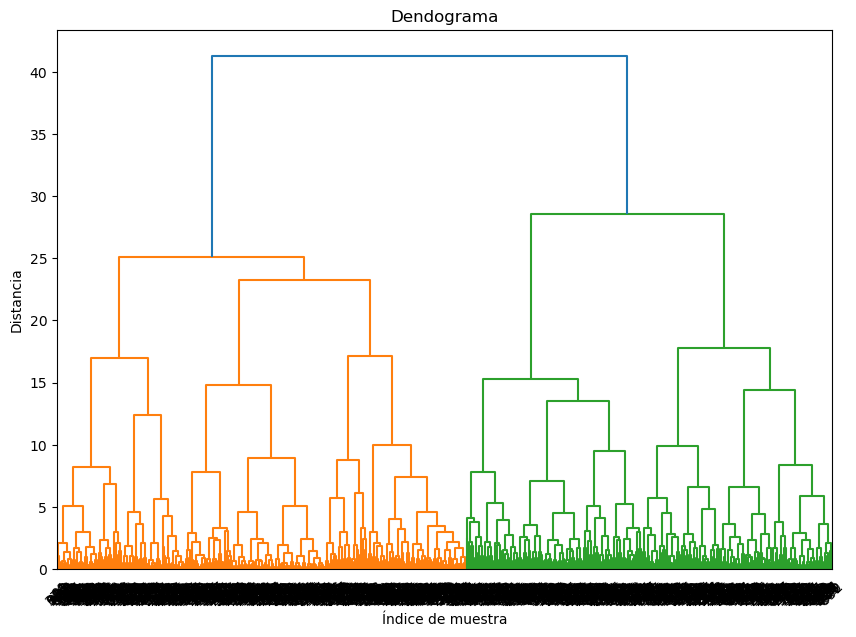

In [47]:
# Graficamos el dendrograma
plt.figure(figsize=(10, 7))
# show_contracted=True para mostrar los clusters de forma más compacta
dendrogram(linked, p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Dendograma")
plt.xlabel("Índice de muestra")
plt.ylabel("Distancia")
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las características relevantes del dataframe muestreado
sampled_features = sampled_df[
    ["months_as_customer", "policy_annual_premium", "capital-gains", "capital-loss"]
]

# Escalamos las características del dataframe muestreado porque son muchos datos
scaler = StandardScaler()
sampled_features_scaled = scaler.fit_transform(sampled_features)

# Ahora sí hacemos el Agglomerative Clustering con los datos muestreados
n_clusters = len(set(clusters)) - (
    1 if -1 in clusters else 0
)  # Número de clusters en DBSCAN
agg_clustering = AgglomerativeClustering(
    n_clusters=n_clusters, metric="euclidean", linkage="ward"
)
agg_clusters = agg_clustering.fit_predict(sampled_features_scaled)

# Agregamos las etiquetas de cluster al dataframe muestreado
sampled_df["agg_cluster"] = agg_clusters
sampled_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,cluster,agg_cluster
115,258,46,648397,1999-03-09,IN,100/300,1000,1110.37,10000000,455365,...,4770,9540,33390,Accura,MDX,1997,Y,NaN,4,6
22,370,55,285496,1994-05-27,IL,100/300,2000,972.18,0,443920,...,17880,5960,47680,Suburu,Forrestor,2000,Y,NaN,-1,6
708,46,41,315041,2010-11-02,OH,100/300,2000,998.19,0,611556,...,13100,19650,45850,Dodge,RAM,2004,Y,NaN,-1,2
307,151,37,931625,2012-10-18,IN,250/500,500,1366.42,0,476198,...,5910,5910,47280,Nissan,Maxima,1998,Y,NaN,1,11
602,16,35,110084,1990-11-27,IL,250/500,1000,1358.03,0,612660,...,10000,10000,35000,Volkswagen,Jetta,2008,Y,NaN,-1,2


### <a id='toc1_1_4_'></a>[Punto 4](#toc0_)
(5 puntos) Reporta la métrica Silhouette de ambos resultados de clustering  e indica cuál es el mejor resultado.

In [50]:
from sklearn.metrics import silhouette_score

# Silhouette score para DBSCAN
silhouette_dbscan = silhouette_score(sampled_features_scaled, sampled_df["cluster"])
print(f"SS del DBSCAN: {silhouette_dbscan:.2f}")

# Silhouette score para AgglomerativeClustering
silhouette_agg = silhouette_score(sampled_features_scaled, sampled_df["agg_cluster"])
print(f"SS del AgglomerativeClustering: {silhouette_agg:.2f}")

# Determinar el mejor resultado dependiendo del silhouette score más alto
if silhouette_dbscan > silhouette_agg:
    print("El modelo DBSCAN tiene un mejor resultado.")
else:
    print("El modelo de Agglomerative Clustering tiene un mejor resultado.")

SS del DBSCAN: -0.13
SS del AgglomerativeClustering: 0.24
El modelo de Agglomerative Clustering tiene un mejor resultado.


## <a id='toc1_2_'></a>[Ejercicios de PCA (40 pts)](#toc0_)


### <a id='toc1_2_1_'></a>[Punto 1](#toc0_)


(5 puntos) Utiliza el dataset de Penguins para aplicar PCA y obtener la tasa de variabilidad explicada por 2 componentes.


In [52]:
# Cargamos el dataset de Penguins y quitamos los nulos
df_penguins = pd.read_csv("penguins.csv")
penguins = df_penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
# Seleccionar características numéricas que queremos analizar
variables_pinguinos = penguins[
    ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
]

In [ ]:
# Normalizamos los datos usando el standard scaler
scaler = StandardScaler()
pinguinos_scaled = scaler.fit_transform(variables_pinguinos)

In [ ]:
# Utilizamos la clase PCA vista en clase
import numpy as np


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean  # now the mean is centered at 0

        # compute the covariance matrix
        cov = np.cov(X, rowvar=False)

        # compute the eigenvalues and eigenvectors of
        # the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # sort the eigenvalues and eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, : self.n_components]

    def transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)
        return X_transformed

In [ ]:
# Usamos PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
pca.fit(pinguinos_scaled)

In [60]:
# Calcular la varianza explicada por cada componente principal
eigenvalues = np.var(pca.transform(pinguinos_scaled), axis=0)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print(
    f"Tasa de variabilidad explicada por las dos componentes principales: {explained_variance_ratio}"
)

Tasa de variabilidad explicada por las dos componentes principales: [0.77916187 0.22083813]


### <a id='toc1_2_2_'></a>[Punto 2](#toc0_)

(5 puntos) Separa en Train y Testing (% de tu elección), aplica algún clasificador y compara su desempeño sin-PCA vs PCA y reporta tus observaciones


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definimos X e y para el modelo de clasificación
X = variables_pinguinos
y = penguins["species"]

# Dividimos los datos en conjuntos de entrenamiento y prueba
# En este caso decidimos usar el 20% de los datos para la prueba y el 80% para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [64]:
# Primero entrenamos el modelo sin PCA
# Utilizamos un clasificador de árbol de decisión
# para predecir la especie de pingüino
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred)
print(f"Precisión sin PCA: {accuracy_no_pca:.2f}")

Precisión sin PCA: 1.00


In [65]:
# Ahora para aplicar PCA primero tenemos que ajustar el modelo PCA a los datos de entrenamiento
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Ahora sí entrenamos el modelo con PCA
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

# Calculamos la precisión del modelo con PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Precisión con PCA: {accuracy_pca:.2f}")

Precisión con PCA: 0.81


Como el modelo sin PCA tiene 1 de score comparado con 0.81 del modelo PCA, entonces el modelo sin PCA es mejor. Esto puede ser porque el modelo PCA no está bien ajustado o porque el modelo sin PCA tiene más información. También puede ser que el modelo PCA esté sobreajustado.


### <a id='toc1_2_3_'></a>[Punto 3](#toc0_)

Utiliza algún modelo de regresión para predecir la variable "Ladder Score" utilizando el conjunto de datos del World Happiness Report 2021, y analiza el impacto del número de componentes principales en el rendimiento del modelo (r2_score). Sigue las indicaciones:


1. (5 pts) Identifica la variable dependiente "Ladder Score" en Y y al resto como X. Separa 10% de instancias para el conjunto de prueba y al resto para entrenamiento.


In [ ]:
# Cargar el conjunto de datos del World Happiness Report 2021
df_happiness = pd.read_csv("world-happiness-report-2021.csv")

In [ ]:
# Usamos "Ladder Score" como variable dependiente Y y al resto X
X = df_happiness.drop(columns=["Ladder score"])
y = df_happiness["Ladder score"]

In [ ]:
from sklearn.model_selection import (
    train_test_split,
)  # Igual usamos train_test_split para separar el conjunto de datos en entrenamiento y prueba

# Separamos 10% para prueba y 90% entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

2. (15 pts) En un bucle, aplica PCA con diferentes números de componentes (de 1 a 8) y evalua el rendimiento del modelo de regresión utilizando r2_score. Cuida que el PCA se entrene con X_train (pca.fit_transform()) y que X_test solo sea utilizado para transformar (pca.transform())


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import (
    PCA,
)  # Nos conviene usar PCA de sklearn para este caso porque si tiene la función fit_transform
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Tenemos que preprocesar los datos para que todo sea numérico
# Identificamos las columnas categóricas
categorical_columns = X.select_dtypes(include=["object"]).columns
numeric_columns = X.select_dtypes(include=["number"]).columns

# Usamos OneHotEncoder para transformar las columnas categóricas en variables dummy
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ]
)  # Manejamos los errores de los valores que son desconocidos con el parámetro handle_unknown='ignore'

# Aplicamos la transformación al conjunto de entrenamiento y prueba
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Hacemos un arreglo vacío para ir guardando los resultados
r2_scores = []

# Iteramos los componentes de 1 a 8
for n_components in range(1, 9):
    # Creamos un PCA con el número actual de componentes
    pca = PCA(n_components=n_components)

    # Ajustamos X_train y transformamos tanto X_train como X_test
    X_train_pca = pca.fit_transform(X_train_processed)
    X_test_pca = pca.transform(X_test_processed)

    # Hacemos un modelo de regresión lineal
    # y lo ajustamos a los datos transformados
    regressor = LinearRegression()
    regressor.fit(X_train_pca, y_train)

    # Predecimos los valores de y para el conjunto de prueba
    y_pred = regressor.predict(X_test_pca)

    # Calculamos el r2_score y lo guardamos
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((n_components, r2))

# Mostramos los resultados
for n_components, r2 in r2_scores:
    print(f"Número de componentes: {n_components}, R2 Score: {r2:.4f}")

Número de componentes: 1, R2 Score: 0.3753
Número de componentes: 2, R2 Score: 0.9971
Número de componentes: 3, R2 Score: 0.9976
Número de componentes: 4, R2 Score: 0.9972
Número de componentes: 5, R2 Score: 0.9974
Número de componentes: 6, R2 Score: 0.9978
Número de componentes: 7, R2 Score: 0.9987
Número de componentes: 8, R2 Score: 0.9987


3. (5 pts) Genera una gráfica de barras que muestre el valor de
en función del número de componentes principales.


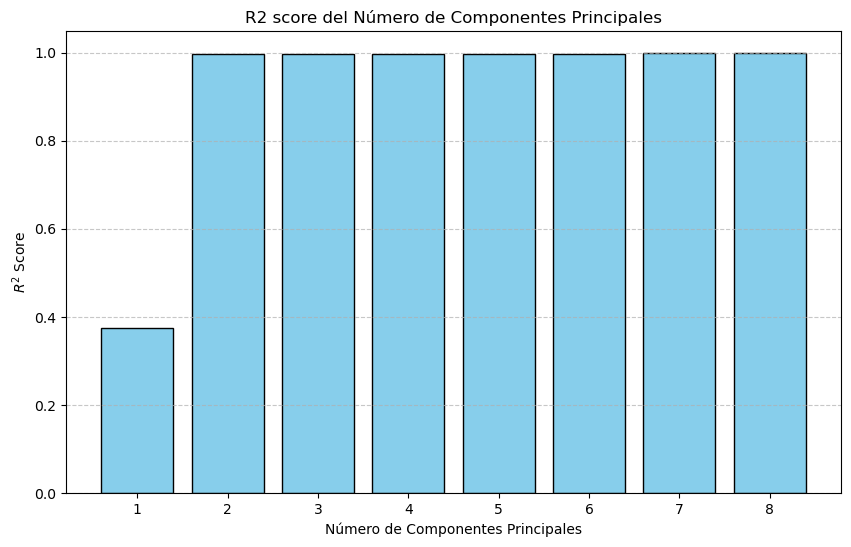

In [90]:
# Primero tenemos que extraer los valores de los componentes y los R2 scores llenando con un ciclo for
components = []
r2_values = []
for score in r2_scores:
    components.append(score[0])
    r2_values.append(score[1])

# Creamos la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(components, r2_values, color="skyblue", edgecolor="black")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("$R^2$ Score")
plt.title("R2 score del Número de Componentes Principales")
plt.xticks(components)  # Aseguramos que todos los componentes se muestren en el eje x
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

4. (3 pts) Analicen los resultados e incluyan sus conclusiones considerando:

- **¿Cómo varía el R2 al aumentar el número de componentes principales?**
  R: Al aumentar el número de componentes principales, el R2 incrementa a casi 1. A partir de ahí, el incremento en el R2 es mucho más pequeño, casi diminuto. Puede ser que haya un sobre ajuste.

- **¿Hay un punto en el que el rendimiento deja de mejorar significativamente?**
  R: Si, porque hay un punto que la gráfica se vuelve casi horizontal. Esto puede ser porque el modelo ya no tiene más información que extraer de los datos.

- **¿Qué implicaciones podría tener esto para la selección de características en modelos de regresión?**
  R: Esto puede implicar que el modelo ya no tiene más información que extraer de los datos y que el modelo puede estar sobreajustado. También puede ser que el modelo esté utilizando características irrelevantes.


```markdown
(1 punto) **¿Cuál es la motivación de reducir la dimensionalidad?**

La motivación principal de reducir la dimensionalidad es simplificar los datos mientras se conserva la mayor cantidad posible de información relevante. Esto ayuda a:

- **Eliminar ruido**: Reducir características irrelevantes o redundantes que pueden afectar el rendimiento del modelo.
- **Mejorar la visualización**: Facilitar la interpretación de los datos al proyectarlos en 2D o 3D.
- **Reducir el costo computacional**: Disminuir el tiempo y los recursos necesarios para entrenar modelos.
- **Evitar el sobreajuste**: Reducir la complejidad del modelo al trabajar con menos características, lo que puede mejorar la generalización.
```

```markdown
(1 punto) **¿Tiene sentido “encadenar” dos procesos de PCA?**

No tiene sentido encadenar dos procesos de PCA. Esto se debe a que el primer PCA ya transforma los datos originales en un espacio de menor dimensionalidad, preservando la mayor cantidad de varianza posible en las primeras componentes principales. Aplicar un segundo PCA sobre el resultado del primero no añade valor, ya que los datos ya están en un espacio reducido y cualquier transformación adicional solo reorganizaría la información sin aportar nueva varianza significativa. Además, podría llevar a una pérdida adicional de información y no tiene una justificación matemática sólida.
```